In [4]:
import pandas as pd

# Carregar os dados de treino
train_data = pd.read_csv('train.csv')
X_train = train_data['comment_text']  # A coluna com os comentários
y_train = train_data.iloc[:, 2:]      # As colunas com as etiquetas de toxicidade

# Carregar os dados de teste
test_data = pd.read_csv('test.csv')
test_labels = pd.read_csv('test_labels.csv')

# Filtrar as entradas de teste onde as etiquetas não são -1
test_labels = test_labels[test_labels['toxic'] != -1]
X_test = test_data[test_data['id'].isin(test_labels['id'])]['comment_text']
y_test = test_labels.iloc[:, 1:]

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /home/pedro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pedro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from nltk.stem import SnowballStemmer

def preprocess_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]

    # Usando SnowballStemmer
    stemmer = SnowballStemmer("english")

    stemmed_tokens = []
    for token in filtered_tokens:
        try:
            stemmed_token = stemmer.stem(token)
            stemmed_tokens.append(stemmed_token)
        except RecursionError:
            # Caso um erro de recursão ocorra, simplesmente use o token não modificado
            print("erro");
            stemmed_tokens.append(token)

    return " ".join(stemmed_tokens)

In [7]:
X_train_preprocessed = [preprocess_text(text) for text in X_train]

In [8]:
X_test_preprocessed = [preprocess_text(text) for text in X_test]

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train_preprocessed)
X_test_transformed = vectorizer.transform(X_test_preprocessed)

In [10]:
""" from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Criar o modelo de rede neural
mlp = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=100, alpha=1e-4,
                    solver='adam', verbose=10, random_state=1,
                    learning_rate_init=.001)

# Treinar o modelo
mlp.fit(X_train_transformed, y_train)

# Fazer previsões no conjunto de teste
y_pred = mlp.predict(X_test_transformed)

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}') """


" from sklearn.neural_network import MLPClassifier\nfrom sklearn.metrics import accuracy_score\n\n# Criar o modelo de rede neural\nmlp = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=100, alpha=1e-4,\n                    solver='adam', verbose=10, random_state=1,\n                    learning_rate_init=.001)\n\n# Treinar o modelo\nmlp.fit(X_train_transformed, y_train)\n\n# Fazer previsões no conjunto de teste\ny_pred = mlp.predict(X_test_transformed)\n\n# Calcular a acurácia\naccuracy = accuracy_score(y_test, y_pred)\nprint(f'Acurácia: {accuracy}') "

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

# Inicializando o modelo Random Forest com OneVsRestClassifier
# Definindo verbose=2 para uma maior verbosidade
model = OneVsRestClassifier(RandomForestClassifier(n_estimators=100, n_jobs=-1, verbose=3))

# Treinando o modelo com o conjunto de treinamento
model.fit(X_train_transformed, y_train)

# Fazendo previsões com o conjunto de teste
y_pred = model.predict(X_test_transformed)

# Calculando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy}')


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.4min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   57.9s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   24.4s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.


Acurácia: 0.8964175185219919


[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    1.1s finished


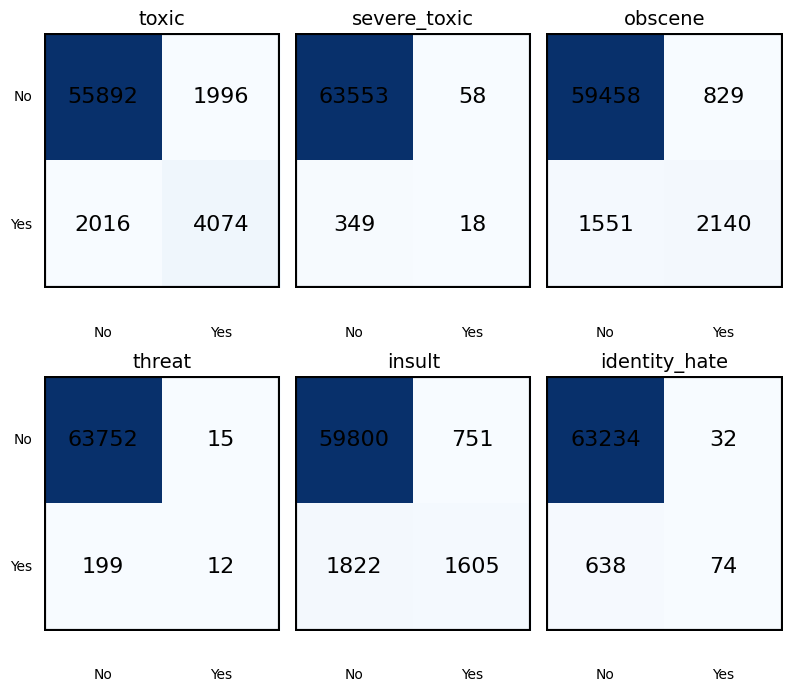

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from matplotlib.patches import Rectangle

# Gerando matrizes de confusão para cada rótulo
confusion_matrices = multilabel_confusion_matrix(y_test, y_pred)

# Nomes das classes (rótulos)
class_names = y_test.columns

# Inicializando a figura para a grade de matrizes de confusão
num_rows = int(np.ceil(len(class_names) / 3))
fig, axarr = plt.subplots(num_rows, 3, figsize=(8, 7))  
axes = axarr.flatten()

# Preenchendo a grade com as matrizes de confusão
for i, matrix in enumerate(confusion_matrices):
    axes[i].imshow(matrix, cmap="Blues", aspect='auto')
    axes[i].set_title(class_names[i], fontsize=14)
    
    # Adicionar anotações numéricas
    for j in range(matrix.shape[0]):
        for k in range(matrix.shape[1]):
            axes[i].text(k, j, str(matrix[j, k]), ha='center', va='center', fontsize=16)
    
    axes[i].axis('off')
    rect = Rectangle((0,0), 1, 1, edgecolor='black', facecolor='none', transform=axes[i].transAxes, linewidth=3)
    axes[i].add_patch(rect)

    # Adicionando rótulos de linha e coluna
    if i % 3 == 0:  # Para a primeira coluna
        for j, cls in enumerate(['No', 'Yes']):  # Substitua por nomes mais apropriados das classes se necessário
            axes[i].text(-0.6, j, cls, ha='right', va='center', color='black', transform=axes[i].transData)

    for j, cls in enumerate(['No', 'Yes']):  # Substitua por nomes mais apropriados das classes se necessário
        axes[i].text(j, 1.9, cls, ha='center', va='bottom', color='black', transform=axes[i].transData)

# Ocultando os eixos não utilizados
for i in range(len(confusion_matrices), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [15]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

# Calculando as métricas para cada rótulo
precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)
f1_per_class = f1_score(y_test, y_pred, average=None)

# Acurácia geral (não por classe, pois a acurácia é uma métrica global)
accuracy_overall = accuracy_score(y_test, y_pred)

# Criando um DataFrame com as métricas
metrics_df = pd.DataFrame({
    'Classe': y_test.columns,
    'Precisão': precision_per_class,
    'Recall': recall_per_class,
    'F1-Score': f1_per_class
})

# Criando uma linha para a acurácia geral
accuracy_df = pd.DataFrame({'Classe': ['Acurácia Geral'], 'Precisão': [accuracy_overall], 'Recall': [accuracy_overall], 'F1-Score': [accuracy_overall]})

# Concatenando com a tabela de métricas
metrics_df = pd.concat([metrics_df, accuracy_df], ignore_index=True)

# Exibindo a tabela
print(metrics_df)


           Classe  Precisão    Recall  F1-Score
0           toxic  0.671170  0.668966  0.670066
1    severe_toxic  0.236842  0.049046  0.081264
2         obscene  0.720781  0.579789  0.642643
3          threat  0.444444  0.056872  0.100840
4          insult  0.681239  0.468340  0.555075
5   identity_hate  0.698113  0.103933  0.180929
6  Acurácia Geral  0.896418  0.896418  0.896418
